In [1]:
data<-read.csv("gaming_accesory_final")
summary(data)

   week_year       list_price      product_mrp          gmv        
 Min.   : 4.00   Min.   : 292.3   Min.   : 657.3   Min.   : 292.3  
 1st Qu.:16.00   1st Qu.: 771.7   1st Qu.:1628.1   1st Qu.: 783.0  
 Median :28.00   Median : 865.0   Median :1735.3   Median : 878.8  
 Mean   :28.41   Mean   : 842.2   Mean   :1954.7   Mean   : 858.2  
 3rd Qu.:41.00   3rd Qu.: 935.5   3rd Qu.:1842.6   3rd Qu.: 950.3  
 Max.   :53.00   Max.   :1041.7   Max.   :4823.1   Max.   :1064.9  
     units            sla        promotional_offer     number      
 Min.   :1.000   Min.   :3.833   Min.   :0.3359    Min.   :0.0000  
 1st Qu.:1.022   1st Qu.:5.431   1st Qu.:0.4076    1st Qu.:0.0000  
 Median :1.027   Median :5.762   Median :0.4335    Median :0.0000  
 Mean   :1.027   Mean   :5.638   Mean   :0.4338    Mean   :0.7143  
 3rd Qu.:1.030   3rd Qu.:5.872   3rd Qu.:0.4545    3rd Qu.:1.0000  
 Max.   :1.058   Max.   :6.500   Max.   :0.5357    Max.   :6.0000  
 Total.Investment       TV           Digital    

### Basic Linear Model

In [2]:
# Building the Baisc Linear regression Model
Linear_model <-data
Linear_model <- scale(Linear_model)
Linear_model <-data.frame(Linear_model)
model_1 <- lm(gmv~.,Linear_model)
print(summary(model_1))


Call:
lm(formula = gmv ~ ., data = Linear_model)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0223948 -0.0025382  0.0005452  0.0037579  0.0092890 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -3.977e-16  1.629e-03   0.000 1.000000    
week_year                2.732e-02  2.909e-02   0.939 0.366130    
list_price               1.140e+00  5.860e-02  19.452 1.93e-10 ***
product_mrp             -6.962e-03  8.193e-03  -0.850 0.412079    
units                    3.063e-02  6.949e-03   4.407 0.000855 ***
sla                     -2.296e-03  5.192e-03  -0.442 0.666234    
promotional_offer       -6.295e-02  7.359e-02  -0.855 0.409073    
number                  -2.935e-03  3.029e-03  -0.969 0.351751    
Total.Investment         4.481e-01  1.937e-01   2.314 0.039207 *  
TV                      -1.612e-01  7.096e-02  -2.271 0.042343 *  
Digital                  3.624e-02  1.186e-01   0.306 0.765105    
Sponsor

Model Selection

In [3]:
library(car)
library(MASS)

all_vifs <- vif(model_1)

 signif_all <- names(all_vifs)

 while(any(all_vifs > 2)){
  var_with_max_vif <- names(which(all_vifs == max(all_vifs)))    # get the var with max vif
  signif_all <- signif_all[!(signif_all) %in% var_with_max_vif]  # remove
  myForm <- as.formula(paste("gmv ~ ", paste (signif_all, collapse=" + "), sep=""))  # new formula
  selectedMod <- lm(myForm, data=Linear_model)  # re-build model with new formula
  all_vifs <- vif(selectedMod)
}

##Final Model 
Linear_Final_model <- selectedMod
print(summary(Linear_Final_model))  




Call:
lm(formula = myForm, data = Linear_model)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.00068 -0.35214  0.04111  0.41357  1.11663 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)   
(Intercept)         -1.683e-15  8.604e-02   0.000  1.00000   
week_year           -3.034e-02  1.059e-01  -0.286  0.77618   
product_mrp          2.513e-01  1.134e-01   2.217  0.03300 * 
units                2.961e-01  1.104e-01   2.681  0.01101 * 
sla                  3.725e-01  1.158e-01   3.216  0.00274 **
number              -1.365e-01  9.424e-02  -1.449  0.15609   
Digital             -1.125e-01  1.084e-01  -1.038  0.30636   
per_order            2.871e-01  1.048e-01   2.740  0.00949 **
Premium_p            2.340e-01  9.749e-02   2.400  0.02168 * 
inc_PO_MA1          -2.250e-01  9.941e-02  -2.263  0.02976 * 
list_price.3         3.243e-03  9.622e-02   0.034  0.97330   
promotional_offer.2 -1.151e-01  1.040e-01  -1.107  0.27566   
NPS.3                1.602

k-fold Cross Validation

In [4]:
library(caret)
# Define training control
set.seed(123)
train.control <- trainControl(method = "cv", number = 10)
# Train the model
cross_val <- train(myForm, data = Linear_model, method = "lm",
               trControl = train.control)
# Summarize the results
print(cross_val)


Loading required package: lattice
Loading required package: ggplot2


Linear Regression 

49 samples
12 predictors

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 43, 45, 46, 43, 43, 45, ... 
Resampling results:

  RMSE       Rsquared   MAE     
  0.7692416  0.4916623  0.622101

Tuning parameter 'intercept' was held constant at a value of TRUE


#### Elasticity Analysis

              Variable   Elasticity direction
1            week_year -0.003067719  Negative
2          product_mrp  0.100699678  Positive
3                units  7.213139578  Positive
4                  sla -0.106053120  Negative
5               number  0.009529928  Positive
6              Digital  0.014975673  Positive
7            per_order -0.072496964  Negative
8            Premium_p  0.100284331  Positive
9           inc_PO_MA1 -0.007943659  Negative
10        list_price.3  0.002034840  Positive
11 promotional_offer.2  0.283241775  Positive
12               NPS.3  0.008776529  Positive


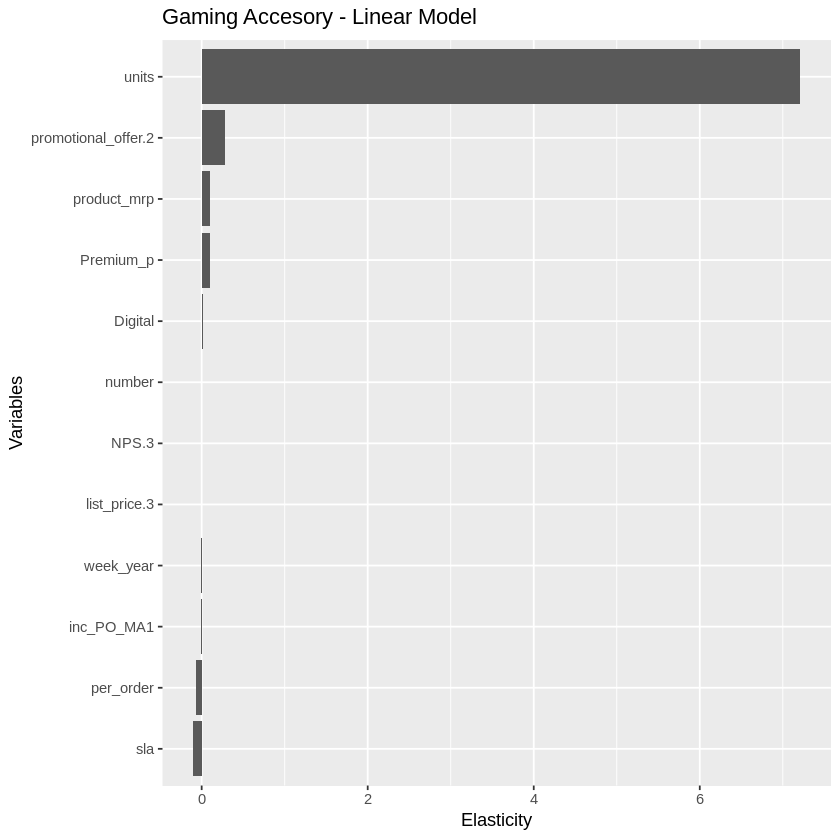

In [5]:
# Elasticity Analysis
train <- Linear_model
hrlm<-Linear_Final_model
# estimating the elasticity coefficients
elasticity <- function(var){
  
  elax1 <-as.numeric(hrlm$coefficients[var]*mean(train[,var])/mean(train$gmv))
  
  return(elax1)
} 
var_list <- list()

for(i in 2:length(hrlm$coefficients)){
  
  var_list[i-1] <-elasticity(names(hrlm$coefficients)[i])
  
}

elasticity.outputs <- data.frame(names(hrlm$coefficients[2:length(hrlm$coefficients)]))
elasticity.outputs <- cbind(elasticity.outputs,do.call(rbind.data.frame, var_list))
colnames(elasticity.outputs) <- c("Variable","Elasticity")

elasticity.outputs$direction <- ifelse(elasticity.outputs$Elasticity > 0, "Positive", "Negative")
print(elasticity.outputs)


print(ggplot(data=elasticity.outputs, aes(x=reorder(Variable,Elasticity),y=Elasticity)) +
  geom_bar(position="dodge",stat="identity") + 
  coord_flip() +
  ggtitle("Gaming Accesory - Linear Model") +xlab("Variables"))


### Multiplicative Model

In [6]:
multi <-data
multi <- multi[,-c(20:28)]
multi$number[which(multi$number==0)] <- 0.01
multi$Content.Marketing[which(multi$Content.Marketing==0)] <- 0.01
multi$per_order[which(multi$per_order==0)] <- 0.01
multi$TV[which(multi$TV==0)] <- 0.01
multi <- log(multi)
## First model ##
multi_model <- lm(gmv~.,multi)
print(summary(multi_model))


Call:
lm(formula = gmv ~ ., data = multi)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0058167 -0.0014104 -0.0003068  0.0018031  0.0045180 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -0.8292872  0.7174453  -1.156   0.2607    
week_year                0.0084326  0.0080411   1.049   0.3062    
list_price               1.0059766  0.0152386  66.015  < 2e-16 ***
product_mrp             -0.0037482  0.0047405  -0.791   0.4380    
units                    0.7901556  0.1461622   5.406 2.31e-05 ***
sla                      0.0046987  0.0115132   0.408   0.6873    
promotional_offer       -0.0104141  0.0114544  -0.909   0.3736    
number                  -0.0001178  0.0002937  -0.401   0.6925    
Total.Investment         0.0341976  0.0306431   1.116   0.2770    
TV                      -0.0094156  0.0082490  -1.141   0.2665    
Digital                  0.0058182  0.0072301   0.805   0.4300    
Sponsorship   

Model Selection

In [7]:
library(car)
library(MASS)

all_vifs <- vif(multi_model)

 signif_all <- names(all_vifs)

 while(any(all_vifs > 1.1)){
  var_with_max_vif <- names(which(all_vifs == max(all_vifs)))    # get the var with max vif
  signif_all <- signif_all[!(signif_all) %in% var_with_max_vif]  # remove
  myForm <- as.formula(paste("gmv ~ ", paste (signif_all, collapse=" + "), sep=""))  # new formula
  selectedMod <- lm(myForm, data=multi)  # re-build model with new formula
  all_vifs <- vif(selectedMod)
}

Multi_Final_model <- selectedMod
print(summary(Multi_Final_model))



Call:
lm(formula = myForm, data = multi)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.98633 -0.05188  0.04504  0.12115  0.20924 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)  
(Intercept)              4.244566   2.337776   1.816   0.0766 .
week_year               -0.008049   0.043635  -0.184   0.8545  
product_procurement_sla  0.424110   0.260904   1.626   0.1115  
list_price.1             0.190500   0.152337   1.251   0.2180  
list_price.2             0.097499   0.154834   0.630   0.5323  
list_price.3            -0.046088   0.153163  -0.301   0.7650  
NPS.3                    0.130775   0.422851   0.309   0.7586  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2036 on 42 degrees of freedom
Multiple R-squared:  0.1026,	Adjusted R-squared:  -0.02559 
F-statistic: 0.8004 on 6 and 42 DF,  p-value: 0.5752



k-fold Cross Validation

In [8]:
library(caret)
# Define training control
set.seed(123)
train.control <- trainControl(method = "cv", number = 10)
# Train the model
cross_val1 <- train(myForm, data = multi, method = "lm",
               trControl = train.control)
# Summarize t1he results
print(cross_val1)

Linear Regression 

49 samples
 6 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 43, 45, 46, 43, 43, 45, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.2339321  0.3031649  0.1682887

Tuning parameter 'intercept' was held constant at a value of TRUE


#### Elasticity Analysis

                 Variable   Elasticity direction
1               week_year -0.003779837  Negative
2 product_procurement_sla  0.057114430  Positive
3            list_price.1  0.189928193  Positive
4            list_price.2  0.097208170  Positive
5            list_price.3 -0.045963426  Negative
6                   NPS.3  0.075574994  Positive


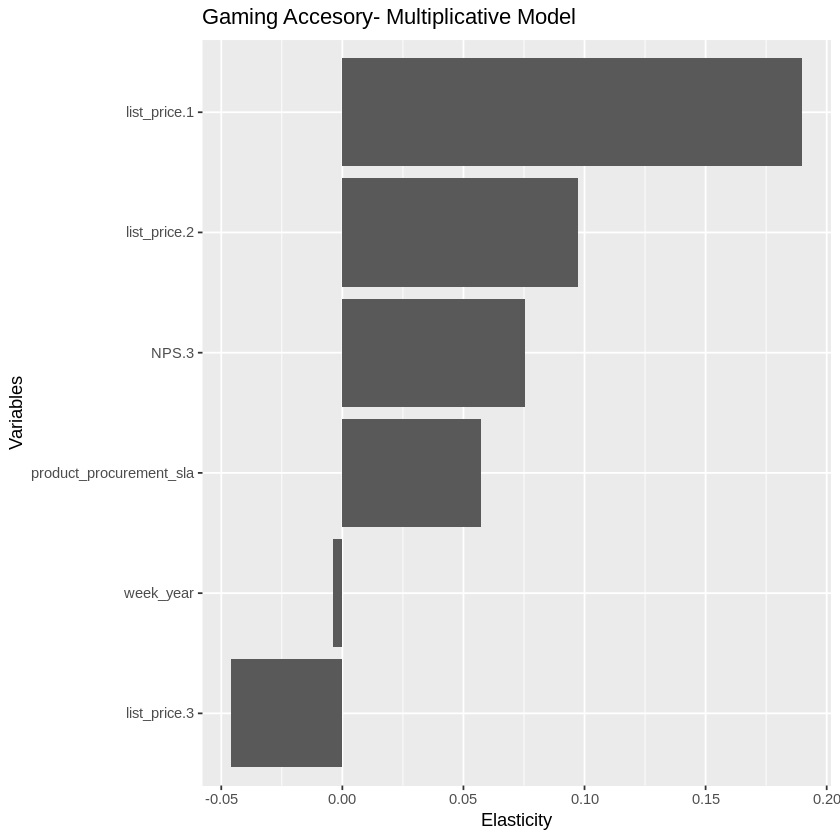

In [9]:
# Elasticity Analysis
train1 <- multi
hrlm1<-Multi_Final_model
# estimating the elasticity coefficients
elasticity1 <- function(var){
  
  elax2 <-as.numeric(hrlm1$coefficients[var]*mean(train1[,var])/mean(train1$gmv))
  
  return(elax2)
} 
var_list <- list()

for(i in 2:length(hrlm1$coefficients)){
  
  var_list[i-1] <-elasticity1(names(hrlm1$coefficients)[i])
  
}

elasticity.outputs1 <- data.frame(names(hrlm1$coefficients[2:length(hrlm1$coefficients)]))
elasticity.outputs1 <- cbind(elasticity.outputs1,do.call(rbind.data.frame, var_list))
colnames(elasticity.outputs1) <- c("Variable","Elasticity")

elasticity.outputs1$direction <- ifelse(elasticity.outputs1$Elasticity > 0, "Positive", "Negative")
print(elasticity.outputs1)


ggplot(data=elasticity.outputs1, aes(x=reorder(Variable,Elasticity),y=Elasticity)) +
  geom_bar(position="dodge",stat="identity") + 
  coord_flip() +
  ggtitle("Gaming Accesory- Multiplicative Model") +xlab("Variables")


### Kyock Model

In [10]:
library(DataCombine)
Home_koyck<-data
#gmv Lag 1
Home_Koyck<-slide(Home_koyck,Var="gmv",slideBy =-1)
Home_Koyck<-na.omit(Home_koyck)
Home_Koyck<-scale(Home_koyck)
Home_Koyck<-data.frame(Home_koyck)

# Build Kyock model
Koy_model <- lm(gmv~.,Home_koyck)
print(summary(Koy_model))




Remember to put Home_koyck in time order before running.

Lagging gmv by 1 time units.




Call:
lm(formula = gmv ~ ., data = Home_koyck)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.06469 -0.34735  0.07461  0.51427  1.27118 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -5.572e+02  2.082e+02  -2.677 0.020162 *  
week_year                2.541e-01  2.706e-01   0.939 0.366130    
list_price               1.166e+00  5.995e-02  19.452 1.93e-10 ***
product_mrp             -1.187e-03  1.397e-03  -0.850 0.412079    
units                    4.486e+02  1.018e+02   4.407 0.000855 ***
sla                     -6.875e-01  1.555e+00  -0.442 0.666234    
promotional_offer       -1.982e+02  2.317e+02  -0.855 0.409073    
number                  -3.036e-01  3.134e-01  -0.969 0.351751    
Total.Investment         1.476e+00  6.380e-01   2.314 0.039207 *  
TV                      -8.697e+00  3.829e+00  -2.271 0.042343 *  
Digital                  1.586e+00  5.188e+00   0.306 0.765105    
Sponsorship             -6.65

In [11]:
all_vifs <- vif(Koy_model)
 signif_all <- names(all_vifs)

 while(any(all_vifs > 2)){
  var_with_max_vif <- names(which(all_vifs == max(all_vifs)))    # get the var with max vif
  signif_all <- signif_all[!(signif_all) %in% var_with_max_vif]  # remove
  myForm <- as.formula(paste("gmv ~ ", paste (signif_all, collapse=" + "), sep=""))  # new formula
  selectedMod <- lm(myForm, data=Home_koyck)  # re-build model with new formula
  all_vifs <- vif(selectedMod)
}

kyock_Final_model <- selectedMod
summary(kyock_Final_model)


Call:
lm(formula = myForm, data = Home_koyck)

Residuals:
     Min       1Q   Median       3Q      Max 
-136.940  -48.189    5.626   56.597  152.809 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)   
(Intercept)         -4.532e+03  1.790e+03  -2.531  0.01587 * 
week_year           -2.822e-01  9.852e-01  -0.286  0.77618   
product_mrp          4.286e-02  1.933e-02   2.217  0.03300 * 
units                4.337e+03  1.618e+03   2.681  0.01101 * 
sla                  1.116e+02  3.468e+01   3.216  0.00274 **
number              -1.412e+01  9.749e+00  -1.449  0.15609   
Digital             -4.921e+00  4.743e+00  -1.038  0.30636   
per_order            2.035e+02  7.427e+01   2.740  0.00949 **
Premium_p            2.696e+00  1.123e+00   2.400  0.02168 * 
inc_PO_MA1          -5.591e+02  2.470e+02  -2.263  0.02976 * 
list_price.3         3.347e-03  9.928e-02   0.034  0.97330   
promotional_offer.2 -3.681e+02  3.326e+02  -1.107  0.27566   
NPS.3                6.100e+

k-fold Cross Validation

In [12]:
library(caret)
# Define training control
set.seed(123)
train.control <- trainControl(method = "cv", number = 10)
# Train the model
cross_val2 <- train(myForm, data = Home_koyck, method = "lm",
               trControl = train.control)
# Summarize t1he results
print(cross_val2)

Linear Regression 

49 samples
12 predictors

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 43, 45, 46, 43, 43, 45, ... 
Resampling results:

  RMSE      Rsquared   MAE    
  105.2691  0.4916623  85.1332

Tuning parameter 'intercept' was held constant at a value of TRUE


#### Elasticity Analysis

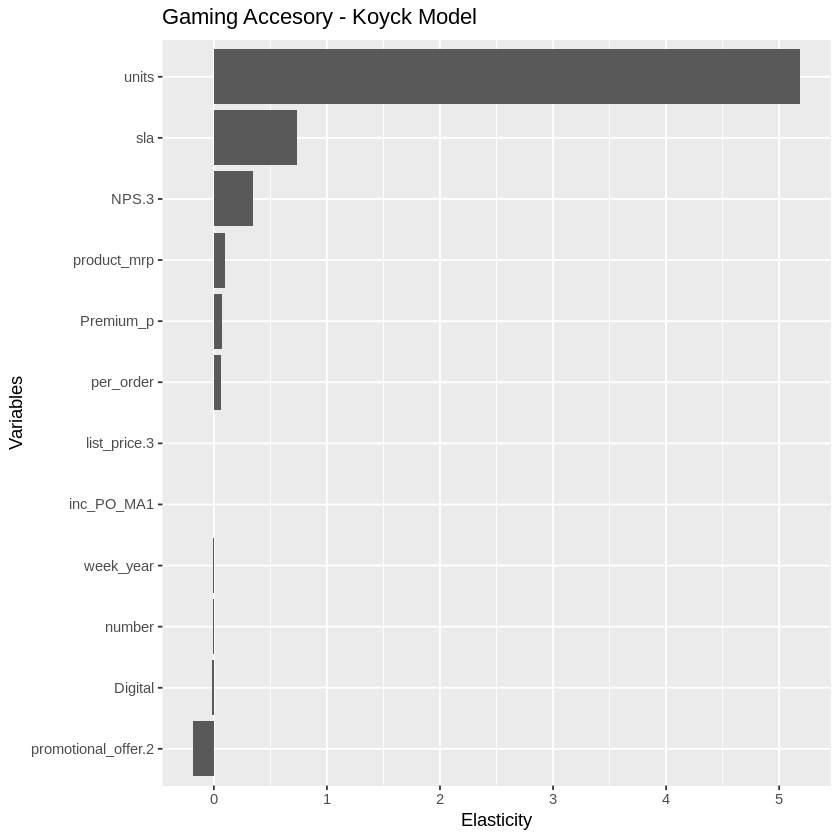

In [13]:
# Elasticity Analysis
train2 <- Home_koyck
hrlm2<-kyock_Final_model
# estimating the elasticity coefficients
elasticity2 <- function(var){
  
  elax2 <-as.numeric(hrlm2$coefficients[var]*mean(train2[,var])/mean(train2$gmv))

  return(elax2)
} 
var_list <- list()

for(i in 2:length(hrlm2$coefficients)){
  
  var_list[i-1] <-elasticity2(names(hrlm2$coefficients)[i])
  
}

elasticity.outputs <- data.frame(names(hrlm2$coefficients[2:length(hrlm2$coefficients)]))
elasticity.outputs <- cbind(elasticity.outputs,do.call(rbind.data.frame, var_list))
colnames(elasticity.outputs) <- c("Variable","Elasticity")

elasticity.outputs$direction <- ifelse(elasticity.outputs$Elasticity > 0, "Positive", "Negative")



ggplot(data=elasticity.outputs, aes(x=reorder(Variable,Elasticity),y=Elasticity)) +
  geom_bar(position="dodge",stat="identity") + 
  coord_flip() +
  ggtitle("Gaming Accesory - Koyck Model") +xlab("Variables")

### Distributed Lag Model

In [14]:
Dis_Model <- data
Dis_model <- slide(Dis_Model, Var = "gmv",slideBy = -1)
Dis_model <- slide(Dis_model, Var = "gmv",slideBy = -2)
Dis_model <- slide(Dis_model, Var = "gmv",slideBy = -3)
Dis_model <- na.omit(Dis_model)
Dis_model <- scale(Dis_model)
Dis_model <- data.frame(Dis_model)

dist_model <- lm(gmv~.,Dis_model)
print(summary(dist_model))



Remember to put Dis_Model in time order before running.

Lagging gmv by 1 time units.


Remember to put Dis_model in time order before running.

Lagging gmv by 2 time units.


Remember to put Dis_model in time order before running.

Lagging gmv by 3 time units.




Call:
lm(formula = gmv ~ ., data = Dis_model)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0200321 -0.0016458  0.0005954  0.0022086  0.0089708 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              3.377e-16  1.974e-03   0.000   1.0000    
week_year                1.172e-02  9.390e-02   0.125   0.9048    
list_price               1.092e+00  8.535e-02  12.792  1.4e-05 ***
product_mrp             -7.462e-03  1.633e-02  -0.457   0.6637    
units                    3.107e-02  1.359e-02   2.287   0.0622 .  
sla                     -5.916e-04  7.628e-03  -0.078   0.9407    
promotional_offer       -3.393e-02  9.920e-02  -0.342   0.7440    
number                  -1.818e-03  4.518e-03  -0.402   0.7013    
Total.Investment         2.162e-01  8.752e-01   0.247   0.8131    
TV                      -8.042e-02  4.114e-01  -0.195   0.8515    
Digital                  3.508e-02  1.132e+00   0.031   0.9763    
Sponsorshi

Model Selection

In [15]:
all_vif <- vif(dist_model)
signif_all <- names(all_vif)

 while(any(all_vif > 2)){
  var_with_max_vif <- names(which(all_vif == max(all_vif)))    # get the var with max vif
  signif_all <- signif_all[!(signif_all) %in% var_with_max_vif]  # remove
  myForm <- as.formula(paste("gmv ~ ", paste (signif_all, collapse=" + "), sep=""))  # new formula
  selectedMod <- lm(myForm, data=Dis_model)  # re-build model with new formula
  all_vif <- vif(selectedMod)
}

Distributed_Final_model <- selectedMod
print(summary(Distributed_Final_model))



Call:
lm(formula = myForm, data = Dis_model)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.07686 -0.34828  0.03427  0.35130  0.84553 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          2.190e-15  8.463e-02   0.000 1.000000    
week_year           -5.004e-02  1.130e-01  -0.443 0.660818    
product_mrp          2.744e-01  1.102e-01   2.489 0.018043 *  
units                2.829e-01  1.080e-01   2.620 0.013200 *  
sla                  4.129e-01  1.112e-01   3.714 0.000752 ***
number              -1.594e-01  9.501e-02  -1.677 0.102933    
TV                  -1.516e-01  9.764e-02  -1.552 0.130158    
per_order            3.462e-01  1.064e-01   3.255 0.002623 ** 
Premium_p            2.054e-01  9.848e-02   2.086 0.044835 *  
inc_PO_MA1          -2.153e-01  9.765e-02  -2.204 0.034581 *  
promotional_offer.2 -1.031e-01  9.970e-02  -1.034 0.308745    
promotional_offer.3  1.913e-01  1.053e-01   1.818 0.078198 .  
NPS.3           

K-FOLD CROSS VALIDATION

In [16]:
library(caret)
# Define training control
set.seed(123)
train.control <- trainControl(method = "cv", number = 10)
# Train the model
cross_val <- train(myForm, data =Dis_model , method = "lm",
               trControl = train.control)
# Summarize t1he results
print(cross_val)

Linear Regression 

46 samples
12 predictors

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 42, 41, 41, 40, 41, 42, ... 
Resampling results:

  RMSE       Rsquared  MAE      
  0.7312253  0.562192  0.6106374

Tuning parameter 'intercept' was held constant at a value of TRUE


#### Elasticity Analysis

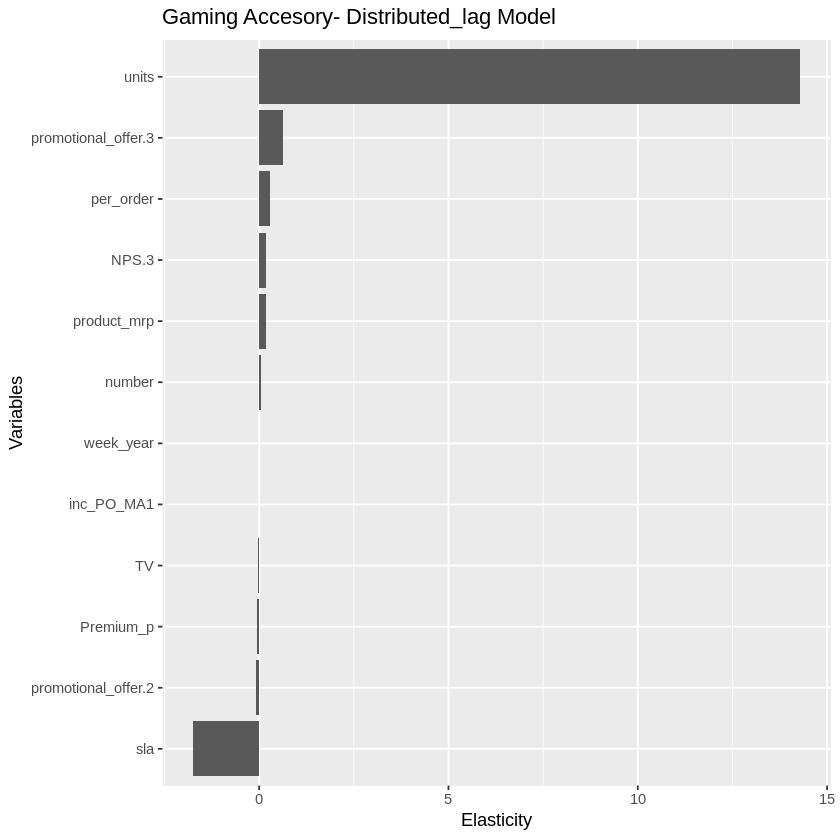

In [17]:
# Elasticity Analysis
train <- Dis_model
hrlm<-Distributed_Final_model
# estimating the elasticity coefficients
elasticity <- function(var){
  elax1 <-as.numeric(hrlm$coefficients[var]*mean(train[,var])/mean(train$gmv))
  return(elax1)
} 
var_list <- list()

for(i in 2:length(hrlm$coefficients)){
  
  var_list[i-1] <- elasticity(names(hrlm$coefficients)[i])
  
}

elasticity.outputs <- data.frame(names(hrlm$coefficients[2:length(hrlm$coefficients)]))
elasticity.outputs <- cbind(elasticity.outputs,do.call(rbind.data.frame, var_list))
colnames(elasticity.outputs) <- c("Variable","Elasticity")

elasticity.outputs$direction <- ifelse(elasticity.outputs$Elasticity > 0, "Positive", "Negative")



ggplot(data=elasticity.outputs, aes(x=reorder(Variable,Elasticity),y=Elasticity)) +
  geom_bar(position="dodge",stat="identity") + 
  coord_flip() +
  ggtitle("Gaming Accesory- Distributed_lag Model") +xlab("Variables")

### Multiplicative + distributed model:

In [18]:
Multi_dist <-data[,-c(20:28)]
Multi_Dis_model_1 <- slide(Multi_dist, Var = "gmv",slideBy = -1)
Multi_Dis_model_1 <- slide(Multi_Dis_model_1, Var = "gmv",slideBy = -2)
Multi_Dis_model_1 <- slide(Multi_Dis_model_1, Var = "gmv",slideBy = -3)
Multi_dist <- na.omit(Multi_Dis_model_1)

Multi_dist$Content.Marketing[which(Multi_dist$Content.Marketing==0)] <-1
Multi_dist$per_order[which(Multi_dist$per_order==0)] <-0.01
Multi_dist$number[which(Multi_dist$number==0)] <-0.01
Multi_dist$TV[which(Multi_dist$TV==0)] <-0.01
Multi_dist <- log(Multi_dist)

distMulti <- lm(gmv~., Multi_dist)
print(summary(distMulti))



Remember to put Multi_dist in time order before running.

Lagging gmv by 1 time units.


Remember to put Multi_Dis_model_1 in time order before running.

Lagging gmv by 2 time units.


Remember to put Multi_Dis_model_1 in time order before running.

Lagging gmv by 3 time units.




Call:
lm(formula = gmv ~ ., data = Multi_dist)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0061139 -0.0009305  0.0000217  0.0009281  0.0037399 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              0.3196299  0.8127114   0.393 0.699640    
week_year                0.0050647  0.0085095   0.595 0.560600    
list_price               0.9986625  0.0165728  60.259  < 2e-16 ***
product_mrp             -0.0022655  0.0048873  -0.464 0.649629    
units                    0.8651767  0.1735084   4.986 0.000163 ***
sla                      0.0046671  0.0137059   0.341 0.738192    
promotional_offer       -0.0122731  0.0133234  -0.921 0.371542    
number                  -0.0001557  0.0003285  -0.474 0.642328    
Total.Investment         0.0583603  0.0372374   1.567 0.137906    
TV                       0.0011122  0.0071752   0.155 0.878888    
Digital                 -0.0014745  0.0083201  -0.177 0.861710    
Sponsorsh

In [19]:
all_vif <- vif(distMulti )
signif_all <- names(all_vif)

 while(any(all_vif > 1.2)){
  var_with_max_vif <- names(which(all_vif == max(all_vif)))    # get the var with max vif
  signif_all <- signif_all[!(signif_all) %in% var_with_max_vif]  # remove
  myForm <- as.formula(paste("gmv ~ ", paste (signif_all, collapse=" + "), sep=""))  # new formula
  selectedMod <- lm(myForm, data=Multi_dist)  # re-build model with new formula
  all_vif <- vif(selectedMod)
}

DistributedMulti_Final_model <- selectedMod
summary(DistributedMulti_Final_model)


Call:
lm(formula = myForm, data = Multi_dist)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52375 -0.08981  0.01362  0.11974  0.25262 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              3.32132    1.26959   2.616   0.0126 *  
week_year               -0.03011    0.04538  -0.664   0.5109    
sla                      1.23579    0.28351   4.359 9.23e-05 ***
number                  -0.01494    0.01044  -1.431   0.1603    
product_procurement_sla  0.38732    0.21804   1.776   0.0835 .  
list_price.2             0.12145    0.12594   0.964   0.3408    
list_price.3             0.02615    0.12692   0.206   0.8378    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.168 on 39 degrees of freedom
Multiple R-squared:  0.4251,	Adjusted R-squared:  0.3366 
F-statistic: 4.806 on 6 and 39 DF,  p-value: 0.0009323


k-fold CROSS VALIDATION

In [20]:
library(caret)
# Define training control
set.seed(123)
train.control <- trainControl(method = "cv", number = 10)
# Train the model
cross_val <- train(myForm, data =Multi_dist , method = "lm",
               trControl = train.control)
# Summarize t1he results
print(cross_val)

Linear Regression 

46 samples
 6 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 42, 41, 41, 40, 41, 42, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.2220338  0.3311451  0.1691446

Tuning parameter 'intercept' was held constant at a value of TRUE


#### ELASTICITY ANALYSIS

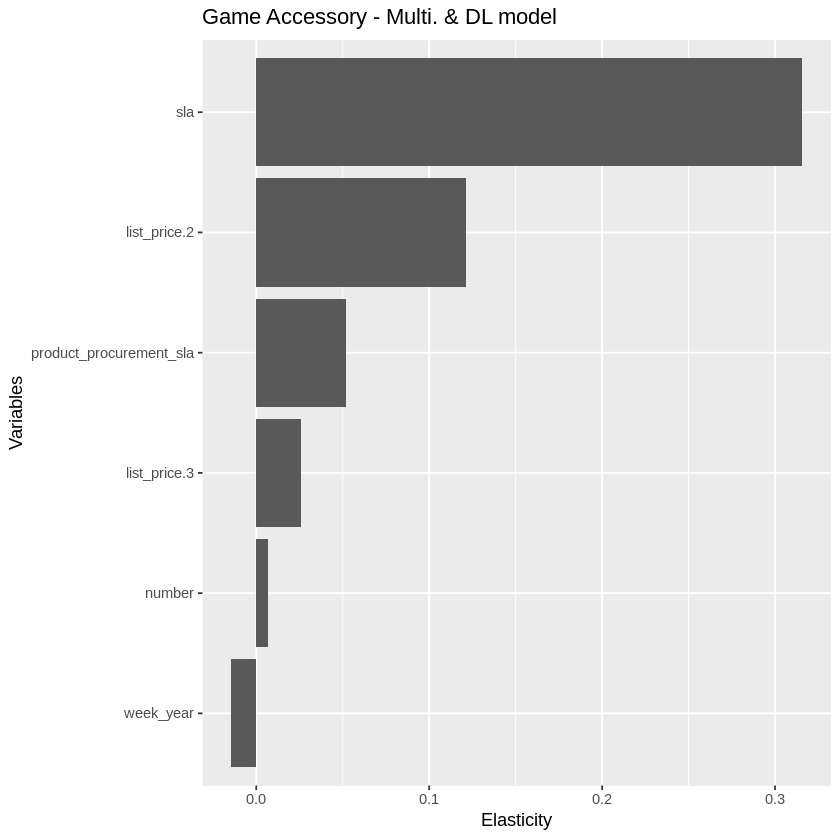

In [21]:
# estimating the elasticity coefficients
train <- Multi_dist

grlm <-DistributedMulti_Final_model 
elasticity <- function(var){
  
  elax1 <-as.numeric(grlm$coefficients[var]*mean(train[,var])/mean(train$gmv))
  
  return(elax1)
} 

var_list <- list()

for(i in 2:length(grlm$coefficients)){
  
  var_list[i-1] <-elasticity(names(grlm$coefficients)[i])
  
}

elasticity.outputs <- data.frame(names(grlm$coefficients[2:length(grlm$coefficients)]))
elasticity.outputs <- cbind(elasticity.outputs,do.call(rbind.data.frame, var_list))
colnames(elasticity.outputs) <- c("Variable","Elasticity")

elasticity.outputs$direction <- ifelse(elasticity.outputs$Elasticity > 0, "Positive", "Negative")



ggplot(data=elasticity.outputs, aes(x=reorder(Variable,Elasticity),y=Elasticity)) +
  geom_bar(position="dodge",stat="identity") + 
  coord_flip() +
  ggtitle("Game Accessory - Multi. & DL model") +xlab("Variables")
